# Day Three: Importing and Cleaning Data before Analysis 
It is rare in Data Analysis to encounter a dataset with no issues, such as missing or invalid data.


Because of this, it is standard practice to 'clean' the data first.



# The Sinking of the Titanic 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Typical Question: Build a predictive model that answers the question: “What sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

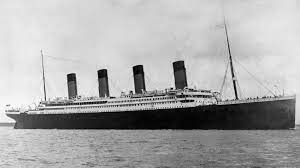

## Importing data 
Before we clean the data, it's time to look at how to import it. Without importing data into our file we would not be able to work with it in any way. The data we use can be stored in different file types, which change the way we import them.

There are three common types that data is stored in:
- csv - Comma Separated Values 
- txt - Text file 
- xlsx - Excel file 

When working with a txt file you must make sure that there is a character separating each column, such as a **,** - this means that it can be exported as a csv file.

Using **Pandas** you can use **read_csv** and **read_excel** respectively for the file type. You must then enter where the data you want is from. This can either be a URL to the raw data (hosted or found on the web) or a file path to where you have saved it on your device.

One common issue that occurs when working with csv files is that, even though the name suggests **commas** are the only thing that separate the columns - this is not always the case! It could be, for example, a semicolon ( ; ).
 
If so, you just have to pass a second parameter into the read_csv file called **sep** and set this to the character that is separating the columns (don't worry if this sounds complicated, we have included the code below for you!

data = pd.read_csv('https://raw.githubusercontent.com/chroadhouse/Futureme/main/Data/titanic.csv', sep=';')

In [ ]:
#Here we import the libraries
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

#Here data is being imported using the url method (meaning the data is being pulled from the web)
data = pd.read_csv('https://raw.githubusercontent.com/chroadhouse/Futureme/main/Data/titanic.csv')

In [ ]:
#Always run this when importing the data to make sure it has imported properly. 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survive,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survive,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning the data 
Our goal here is to ensure that any missing data is filled, and that any incorrect data is removed.​

To find which data is missing, we can use **.info**, which will show us the null count for the columns.

Take a look at the table below - do any seem like they are missing data?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<AxesSubplot:>

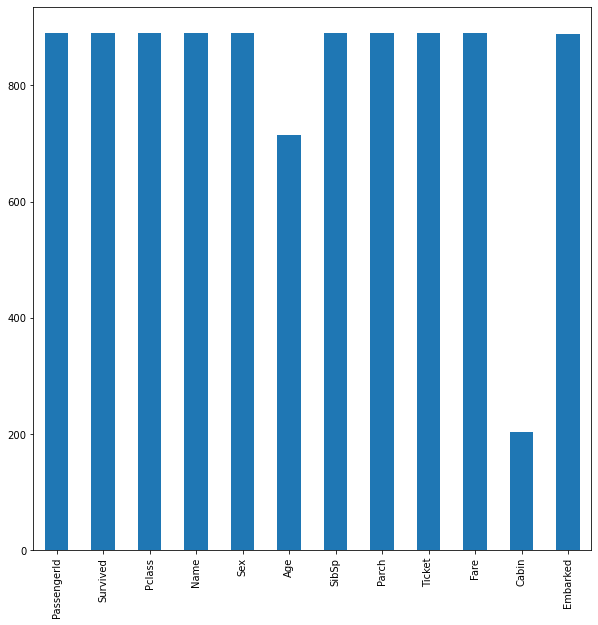

In [ ]:
#We can also show this data in graph form
data.isna().sum()

#This code shows us graphically how many null values are in our dataset 
fullData = ~data.isna()
plt.figure(figsize=(10,10))
fullData.sum().plot(kind='bar')

In [ ]:
#First start addressing the data by dropping the the cabin column 
#We want to get rid of this data since there is more than half missing already!

#Here we name the column we need removing using the .drop method
new_data = data.drop(columns='Cabin')

new_data.head()
#Cabin data is now removed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not Survive,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,Not Survive,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Now we look at filling in the missing data for the age column
#A common way to fill in numerical data is to fill it in with the mean of the current data

#Mean of age stored in this variable
mean_age = new_data['Age'].mean()
mean_age

29.69911764705882

In [ ]:
#There are two main ways to then replace this data 

#This targets the NaN and replaces it with the mean age - this method uses the numpy library
new_data['Age'] = new_data['Age'].replace(np.nan, mean_age)

#This method is specific for filling NaNs 
new_data['Age'] = new_data['Age'].fillna(mean_age)

In [ ]:
#Here we test if filling the data worked 
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
#Now we need to fill in the missing values for the Embarked column - we want to replace with the most common category 
new_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#So we want to replace any missing values with S 
new_data['Embarked'] = new_data['Embarked'].fillna('S')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Converting Continuous data to Categorical data
Sometimes we want to change the way we represent our data. An example of this is changing the data from continuous to categorical. In the example below, the Age column will be changed from the numbers into categories of young, adult and elder.


In [ ]:
#We must change the Age from a float to an int to be able to convert the data. Simply goes from a decimal to a whole number
#Uses Numpy to get the int64 type which we pass into pandas to be able to convert
new_data['Age'] = new_data['Age'].astype(np.int64)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [ ]:
#Changes Age from an integer to three different categories of child, adult and elder
new_data['Age'] = pd.cut(new_data['Age'],bins=[0,17,65,99],labels=['Child','Adult','Elder'])

In [ ]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not Survive,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S
4,5,Not Survive,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S


In [ ]:
# We can see the frequency of all three
new_data['Age'].value_counts()

Adult    770
Child    106
Elder      8
Name: Age, dtype: int64

# Furthering your Data Analysis Journey
If you are enjoying this course so far why not think about learning more, whilst also earning some more RISE points too? 

You can sign up for Python for Scientific Computing and TensorFlow for Artificial Intelligence with Stephen Lynch: https://rise.mmu.ac.uk/activity/python-for-scientific-computing-and-tensorflow-for-artificial-intelligence-3/

Or you could also preorder Stephens's book, which is centered around Python for Artificial Intelligence and Scientific Computing: https://www.routledge.com/Python-for-Scientific-Computing-and-Artificial-Intelligence/Lynch/p/book/9781032258713#